In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
from scipy.stats import linregress

# Assign Data File Locations
cobra_09_path = "data/COBRA-2009-2019.csv"
cobra_20_path = "data/COBRA-2020.csv"
cobra_20_Old_path = "data/COBRA-2020-Old.csv"
cobra_21_path = "data/COBRA-2021.csv"
weather_data_path = "data/weather_data.csv"
cases_path = "data/cdc_covid_data.csv"

# Read the data files into dataframes
cobra_09 = pd.read_csv(cobra_09_path, low_memory=False)
cobra_20 = pd.read_csv(cobra_20_path)
cobra_20_Old = pd.read_csv(cobra_20_Old_path)
cobra_21 = pd.read_csv(cobra_21_path)
weather_data = pd.read_csv(weather_data_path)
cases = pd.read_csv(cases_path)

In [2]:
#Assign column names and drop unneeded columns for cobra_09
cobra_09.columns = ['offense_id','rpt_date','occur_date','occur_time','poss_date','poss_time','beat','apt_office_prefix', 'apt_office_num', 'location', 'shift_occurence','location_type','UC2_Literal','UC2#','ibr_code','neighborhood','npu','lat','long']
cobra_09 = cobra_09.drop(columns = ['apt_office_prefix','apt_office_num','shift_occurence','location_type','UC2#', 'poss_date'])
cobra_09

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,2009-01-01,2009-01-01,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,193652089,2019-12-31,2019-12-31,2030,2034.0,105.0,1385 SHARON ST NW,AGG ASSAULT,1315K,Hunter Hills,K,33.75486,-84.43287
342910,193650336,2019-12-31,2019-12-31,0432,432.0,206.0,262 PHARR RD NE,AGG ASSAULT,1314,Buckhead Village,B,33.83732,-84.37860
342911,193650603,2019-12-31,2019-12-31,0920,940.0,404.0,689 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73636,-84.43680
342912,193651760,2019-12-31,2019-12-31,1853,1900.0,404.0,763 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73483,-84.43750


In [3]:
#Change date format
cobra_09['rpt_date']= pd.to_datetime(cobra_09['rpt_date'])
cobra_09['occur_date']= pd.to_datetime(cobra_09['occur_date'])
cobra_09['rpt_date'] = cobra_09['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_09['occur_date'] = cobra_09['occur_date'].dt.strftime("%m/%d/%Y")
cobra_09.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [4]:
#Insert new column: occur_year and delete any years that don't begin with 20
cobra_09.insert(3,'occur_year',cobra_09['occur_date'].str[-4:])
cobra_09_delete = cobra_09.loc[cobra_09['occur_year'].str[:2] != '20']
cobra_09_delete_list = cobra_09_delete['offense_id'].to_list()
cobra_09 = cobra_09[~cobra_09['offense_id'].isin(cobra_09_delete_list)]
cobra_09

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,193652089,12/31/2019,12/31/2019,2019,2030,2034.0,105.0,1385 SHARON ST NW,AGG ASSAULT,1315K,Hunter Hills,K,33.75486,-84.43287
342910,193650336,12/31/2019,12/31/2019,2019,0432,432.0,206.0,262 PHARR RD NE,AGG ASSAULT,1314,Buckhead Village,B,33.83732,-84.37860
342911,193650603,12/31/2019,12/31/2019,2019,0920,940.0,404.0,689 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73636,-84.43680
342912,193651760,12/31/2019,12/31/2019,2019,1853,1900.0,404.0,763 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73483,-84.43750


In [5]:
#Assign column names and drop unneeded columns for cobra_20_old
cobra_20_Old.columns = ['offense_id','rpt_date','occur_date','occur_time','poss_date','poss_time','beat','apt_office_prefix', 'apt_office_num', 'location', 'shift_occurence','location_type','UC2_Literal','UC2#','neighborhood','npu','lat','long']
cobra_20_Old = cobra_20_Old.drop(columns = ['apt_office_prefix','apt_office_num','shift_occurence','location_type','UC2#', 'poss_date'])
cobra_20_Old

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,neighborhood,npu,lat,long
0,200021209,1/2/20,1/2/20,15:21,15:35,511.0,12 BROAD ST SW,HOMICIDE,Downtown,M,33.75352,-84.39189
1,200061707,1/6/20,1/6/20,0:00,18:25,109.0,785 PEYTON AVE NW,HOMICIDE,Center Hill,J,33.77655,-84.46770
2,200100013,1/10/20,1/9/20,23:45,0:00,110.0,1977 JONES AVE NW,HOMICIDE,West Highlands,G,33.78738,-84.45208
3,200151818,1/16/20,1/15/20,17:15,17:40,401.0,549 JOSEPH LOWERY BLVD,HOMICIDE,West End,T,33.74001,-84.41782
4,200180440,1/18/20,1/18/20,3:31,3:31,206.0,28 IRBY AVE NW,HOMICIDE,South Tuxedo Park,B,33.84102,-84.38018
...,...,...,...,...,...,...,...,...,...,...,...,...
14826,202670466,9/23/20,9/22/20,18:00,9:00,609.0,1207 HARDEE ST NE,AUTO THEFT,Edgewood,O,33.75524,-84.34801
14827,202670717,9/23/20,9/22/20,21:30,10:00,609.0,195 ARIZONA AVE NE,AUTO THEFT,Edgewood,O,33.75929,-84.33120
14828,202680455,9/24/20,9/23/20,23:00,7:00,609.0,1661 LA FRANCE ST NE,AUTO THEFT,Edgewood,O,33.76103,-84.33185
14829,202731007,9/29/20,9/26/20,18:00,14:30,607.0,694 SCHUYLER AVE SE,AUTO THEFT,Boulevard Heights,W,33.72520,-84.36533


In [6]:
#Change Date Format
cobra_20_Old['rpt_date']= pd.to_datetime(cobra_20_Old['rpt_date'])
cobra_20_Old['occur_date']= pd.to_datetime(cobra_20_Old['occur_date'])
cobra_20_Old['rpt_date'] = cobra_20_Old['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_20_Old['occur_date'] = cobra_20_Old['occur_date'].dt.strftime("%m/%d/%Y")
cobra_20_Old.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,neighborhood,npu,lat,long
0,200021209,01/02/2020,01/02/2020,15:21,15:35,511.0,12 BROAD ST SW,HOMICIDE,Downtown,M,33.75352,-84.39189
1,200061707,01/06/2020,01/06/2020,0:00,18:25,109.0,785 PEYTON AVE NW,HOMICIDE,Center Hill,J,33.77655,-84.46770
2,200100013,01/10/2020,01/09/2020,23:45,0:00,110.0,1977 JONES AVE NW,HOMICIDE,West Highlands,G,33.78738,-84.45208
3,200151818,01/16/2020,01/15/2020,17:15,17:40,401.0,549 JOSEPH LOWERY BLVD,HOMICIDE,West End,T,33.74001,-84.41782
4,200180440,01/18/2020,01/18/2020,3:31,3:31,206.0,28 IRBY AVE NW,HOMICIDE,South Tuxedo Park,B,33.84102,-84.38018


In [7]:
#Insert new column: occur_year and delete any years that don't begin with 20
cobra_20_Old.insert(3,'occur_year',cobra_20_Old['occur_date'].str[-4:])
cobra_20_Old_delete = cobra_20_Old.loc[cobra_20_Old['occur_year'].str[:2] != '20']
cobra_20_Old_delete_list = cobra_20_Old_delete['offense_id'].to_list()
cobra_20_Old = cobra_20_Old[~cobra_20_Old['offense_id'].isin(cobra_20_Old_delete_list)]
cobra_20_Old

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,neighborhood,npu,lat,long
0,200021209,01/02/2020,01/02/2020,2020,15:21,15:35,511.0,12 BROAD ST SW,HOMICIDE,Downtown,M,33.75352,-84.39189
1,200061707,01/06/2020,01/06/2020,2020,0:00,18:25,109.0,785 PEYTON AVE NW,HOMICIDE,Center Hill,J,33.77655,-84.46770
2,200100013,01/10/2020,01/09/2020,2020,23:45,0:00,110.0,1977 JONES AVE NW,HOMICIDE,West Highlands,G,33.78738,-84.45208
3,200151818,01/16/2020,01/15/2020,2020,17:15,17:40,401.0,549 JOSEPH LOWERY BLVD,HOMICIDE,West End,T,33.74001,-84.41782
4,200180440,01/18/2020,01/18/2020,2020,3:31,3:31,206.0,28 IRBY AVE NW,HOMICIDE,South Tuxedo Park,B,33.84102,-84.38018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,202670466,09/23/2020,09/22/2020,2020,18:00,9:00,609.0,1207 HARDEE ST NE,AUTO THEFT,Edgewood,O,33.75524,-84.34801
14827,202670717,09/23/2020,09/22/2020,2020,21:30,10:00,609.0,195 ARIZONA AVE NE,AUTO THEFT,Edgewood,O,33.75929,-84.33120
14828,202680455,09/24/2020,09/23/2020,2020,23:00,7:00,609.0,1661 LA FRANCE ST NE,AUTO THEFT,Edgewood,O,33.76103,-84.33185
14829,202731007,09/29/2020,09/26/2020,2020,18:00,14:30,607.0,694 SCHUYLER AVE SE,AUTO THEFT,Boulevard Heights,W,33.72520,-84.36533


In [8]:
#Assign column names and drop unneeded columns for cobra_20
cobra_20 = cobra_20.drop(columns = ['apt_office_prefix','apt_office_num','MinOfucr','dispo_code','Shift','loc_type', 'poss_date'])
cobra_20_reorder = ['offense_id','rpt_date','occur_date','occur_time','poss_time','beat','location','ibr_code','UC2_Literal','neighborhood','npu','lat','long']
cobra_20_reordered = cobra_20.reindex(columns = cobra_20_reorder)
cobra_20 = cobra_20_reordered.copy()

In [9]:
#Insert new column: occur_year and delete any years that don't begin with 20
cobra_20.insert(3,'occur_year',cobra_20['occur_date'].str[-4:])
cobra_20_delete = cobra_20.loc[cobra_20['occur_year'].str[:2] != '20']
cobra_20_delete_list = cobra_20_delete['offense_id'].to_list()
cobra_20 = cobra_20[~cobra_20['offense_id'].isin(cobra_20_delete_list)]
cobra_20.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203341346,12/31/2020,11/29/2020,2020,19:21,23:50,405,3050 M.L.K. JR DR SW,13A,AGG ASSAULT,Harland Terrace,I,33.751060,-84.486163
1,203631200,12/31/2020,12/28/2020,2020,17:21,17:45,302,1186 IRA ST SW,23H,LARCENY-NON VEHICLE,Pittsburgh,V,33.722696,-84.399763
2,203631285,12/31/2020,12/24/2020,2020,14:00,18:26,603,501 BOULEVARD PL NE,23H,LARCENY-NON VEHICLE,Old Fourth Ward,M,33.769680,-84.370736
3,203651634,12/31/2020,12/30/2020,2020,20:15,22:25,211,3101 PIEDMONT RD NE,23F,LARCENY-FROM VEHICLE,Peachtree Park,B,33.840653,-84.369361
4,203660108,12/31/2020,12/31/2020,2020,1:15,1:15,306,1974 SYLVAN RD SW,13A,AGG ASSAULT,Sylvan Hills,X,33.700432,-84.418128


In [10]:
#Change date format
cobra_20['rpt_date']= pd.to_datetime(cobra_20['rpt_date'])
cobra_20['occur_date']= pd.to_datetime(cobra_20['occur_date'])
cobra_20['rpt_date'] = cobra_20['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_20['occur_date'] = cobra_20['occur_date'].dt.strftime("%m/%d/%Y")
cobra_20.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203341346,12/31/2020,11/29/2020,2020,19:21,23:50,405,3050 M.L.K. JR DR SW,13A,AGG ASSAULT,Harland Terrace,I,33.751060,-84.486163
1,203631200,12/31/2020,12/28/2020,2020,17:21,17:45,302,1186 IRA ST SW,23H,LARCENY-NON VEHICLE,Pittsburgh,V,33.722696,-84.399763
2,203631285,12/31/2020,12/24/2020,2020,14:00,18:26,603,501 BOULEVARD PL NE,23H,LARCENY-NON VEHICLE,Old Fourth Ward,M,33.769680,-84.370736
3,203651634,12/31/2020,12/30/2020,2020,20:15,22:25,211,3101 PIEDMONT RD NE,23F,LARCENY-FROM VEHICLE,Peachtree Park,B,33.840653,-84.369361
4,203660108,12/31/2020,12/31/2020,2020,1:15,1:15,306,1974 SYLVAN RD SW,13A,AGG ASSAULT,Sylvan Hills,X,33.700432,-84.418128


In [11]:
#Drop unneeded columns for cobra_09
cobra_21 = cobra_21.drop(columns = ['occur_day','occur_day_num','occur_day_num','zone', 'poss_date'])
cobra_21.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\nATLANTA, GA 30318\nUNIT...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,22:23,22:24,508,"300 PEACHTREE ST NE\nATLANTA, GA 30308\nUNITED...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,6/28/2021,6/27/2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\nATLANTA, GA 30314\nUN...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,1/5/2021,1/4/2021,16:00,17:00,605,"275 MEMORIAL DR SE\nATLANTA, GEORGIA 30312\nUN...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,9/18/2021,9/18/2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\nATLANTA, GA...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433


In [12]:
#Insert new column: occur_year and delete any years that don't begin with 20
cobra_21.insert(3,'occur_year',cobra_21['occur_date'].str[-4:])
cobra_21_delete = cobra_21.loc[cobra_21['occur_year'].str[:2] != '20']
cobra_21_delete_list = cobra_21_delete['offense_id'].to_list()
cobra_21 = cobra_21[~cobra_21['offense_id'].isin(cobra_21_delete_list)]
cobra_21

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\nATLANTA, GA 30318\nUNIT...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,2021,22:23,22:24,508,"300 PEACHTREE ST NE\nATLANTA, GA 30308\nUNITED...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,6/28/2021,6/27/2021,2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\nATLANTA, GA 30314\nUN...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,1/5/2021,1/4/2021,2021,16:00,17:00,605,"275 MEMORIAL DR SE\nATLANTA, GEORGIA 30312\nUN...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,9/18/2021,9/18/2021,2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\nATLANTA, GA...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,212940064,10/21/2021,10/21/2021,2021,02:24,02:25,112,"3200 DONALD LEE HOLLOWELL PKWY NW\nATLANTA, GA...",23F,LARCENY-FROM VEHICLE,Collier Heights,I,33.786330,-84.492188
17628,212940073,10/21/2021,10/21/2021,2021,00:35,00:45,111,"71 LINKWOOD RD NW\nATL, GA 30311\nUNITED STATES",13A,AGG ASSAULT,Westhaven,I,33.757226,-84.482355
17629,212940212,10/21/2021,10/21/2021,2021,02:49,03:28,409,"3113 CAMPBELLTON RD SW\nATLANTA, GA 30311\nUNI...",240,AUTO THEFT,Southwest,R,33.692468,-84.490825
17630,213000875,8/18/2021,7/10/2021,2021,16:00,12:14,612,"491 FLAT SHOALS AVE SE\nATLANTA, GA 30316\nUNI...",23F,LARCENY-FROM VEHICLE,East Atlanta,W,33.740555,-84.346336


In [13]:
#change date format
cobra_21['rpt_date']= pd.to_datetime(cobra_21['rpt_date'])
cobra_21['occur_date']= pd.to_datetime(cobra_21['occur_date'])
cobra_21['rpt_date'] = cobra_21['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_21['occur_date'] = cobra_21['occur_date'].dt.strftime("%m/%d/%Y")
cobra_21.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,05/20/2021,05/19/2021,2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\nATLANTA, GA 30318\nUNIT...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,08/06/2021,08/06/2021,2021,22:23,22:24,508,"300 PEACHTREE ST NE\nATLANTA, GA 30308\nUNITED...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,06/28/2021,06/27/2021,2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\nATLANTA, GA 30314\nUN...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,01/05/2021,01/04/2021,2021,16:00,17:00,605,"275 MEMORIAL DR SE\nATLANTA, GEORGIA 30312\nUN...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,09/18/2021,09/18/2021,2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\nATLANTA, GA...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433


In [14]:
#concatenate all crime data
concat_list = [cobra_09, cobra_20,cobra_20_Old, cobra_21]  # List of your dataframes
crime_df_complete = pd.concat(concat_list)
crime_df_complete.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [15]:
#insert 2 new columns: occur_month and occur_day
crime_df_complete.insert(4,'occur_month',crime_df_complete['occur_date'].str[:2])
crime_df_complete.insert(5,'occur_day',crime_df_complete['occur_date'].str[3:5])
crime_df_complete

,offense_id,rpt_date,occur_date,occur_year,occur_month,occur_day,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,01,01,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.688450,-84.493280
1,90011083,01/01/2009,01/01/2009,2009,01,01,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.753200,-84.392010
2,90011208,01/01/2009,01/01/2009,2009,01,01,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.757350,-84.502820
3,90011218,01/01/2009,01/01/2009,2009,01,01,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.846760,-84.362120
4,90011289,01/01/2009,01/01/2009,2009,01,01,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.686770,-84.497730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,212940064,10/21/2021,10/21/2021,2021,10,21,02:24,02:25,112,"3200 DONALD LEE HOLLOWELL PKWY NW\nATLANTA, GA...",LARCENY-FROM VEHICLE,23F,Collier Heights,I,33.786330,-84.492188
17628,212940073,10/21/2021,10/21/2021,2021,10,21,00:35,00:45,111,"71 LINKWOOD RD NW\nATL, GA 30311\nUNITED STATES",AGG ASSAULT,13A,Westhaven,I,33.757226,-84.482355
17629,212940212,10/21/2021,10/21/2021,2021,10,21,02:49,03:28,409,"3113 CAMPBELLTON RD SW\nATLANTA, GA 30311\nUNI...",AUTO THEFT,240,Southwest,R,33.692468,-84.490825
17630,213000875,08/18/2021,07/10/2021,2021,07,10,16:00,12:14,612,"491 FLAT SHOALS AVE SE\nATLANTA, GA 30316\nUNI...",LARCENY-FROM VEHICLE,23F,East Atlanta,W,33.740555,-84.346336


In [16]:
#cast date values as numbers to allow for numerical comparison '>''<''=='
crime_df_complete[['occur_year','occur_month', 'occur_day']] = crime_df_complete[['occur_year','occur_month', 'occur_day']].apply(pd.to_numeric)

In [17]:
#create list of dates to exclude
delete_dates = crime_df_complete.loc[((crime_df_complete['occur_year'] == 2021) & (crime_df_complete['occur_month'] > 9 )) | (crime_df_complete['occur_year'] < 2009)]
delete_dates_list = delete_dates['offense_id'].tolist()

In [18]:
#exclude data from crime_df_complete
crime_df_complete = crime_df_complete[~crime_df_complete['offense_id'].isin(delete_dates_list)]
crime_df_complete

,offense_id,rpt_date,occur_date,occur_year,occur_month,occur_day,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1,1,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.688450,-84.493280
1,90011083,01/01/2009,01/01/2009,2009,1,1,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.753200,-84.392010
2,90011208,01/01/2009,01/01/2009,2009,1,1,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.757350,-84.502820
3,90011218,01/01/2009,01/01/2009,2009,1,1,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.846760,-84.362120
4,90011289,01/01/2009,01/01/2009,2009,1,1,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.686770,-84.497730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17506,212920558,10/19/2021,07/14/2021,2021,7,14,09:30,10:00,106,"732 JOSEPH E LOWERY BLVD NW\nATLANTA, GA 30318...",LARCENY-NON VEHICLE,23H,Bankhead,K,33.774456,-84.418697
17527,212921334,10/19/2021,08/15/2021,2021,8,15,08:00,16:00,503,"77 12TH ST NE\nATLANTA, GA 30309\nUNITED STATES",LARCENY-NON VEHICLE,23D,Midtown,E,33.784185,-84.385024
17555,212928054,10/19/2021,09/25/2021,2021,9,25,11:46,11:46,703,"6000 N TERMINAL PKWY\nCOLLEGE PARK, GA 30320\n...",LARCENY-NON VEHICLE,23H,NaN,NaN,33.642110,-84.421260
17591,212931106,10/20/2021,02/05/2021,2021,2,5,12:00,12:00,205,"2540 WOODWARD WAY NW\nATLANTA, GA 30305\nUNITE...",LARCENY-NON VEHICLE,23H,Peachtree Battle Alliance,C,33.824092,-84.396710


In [19]:
#Export dataframe to csv file
crime_df_complete.to_csv("Crime Data.csv")

In [20]:
#create new dataframe aggregating crime by year and month
crime_year_month = crime_df_complete.groupby(['occur_year', 'occur_month'], as_index = False).agg({'offense_id': ['count']})
crime_year_month.columns = ['occur_year','occur_month','no._offenses']
crime_year_month

,occur_year,occur_month,no._offenses
0,2009,1,3432
1,2009,2,2636
2,2009,3,3029
3,2009,4,3068
4,2009,5,3428
...,...,...,...
148,2021,5,1596
149,2021,6,1546
150,2021,7,2046
151,2021,8,2048


In [21]:
#create new dataframe aggregating crime by year and month
crime_year = crime_df_complete.groupby(['occur_year'], as_index = False).agg({'offense_id': ['count']})
crime_year.columns = ['occur_year', 'no._offenses']
crime_year

,occur_year,no._offenses
0,2009,39326
1,2010,35532
2,2011,34852
3,2012,33384
4,2013,32398
5,2014,31115
6,2015,30060
7,2016,29007
8,2017,26387
9,2018,25616


In [22]:
#visualize weather df
weather_data

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1230768000,2009-01-01 00:00:00 +0000 UTC,-18000,Atlanta,33.748995,-84.387982,39.65,34.75,39.33,39.94,...,330,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
1,1230771600,2009-01-01 01:00:00 +0000 UTC,-18000,Atlanta,33.748995,-84.387982,38.75,34.39,38.43,39.42,...,330,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2,1230775200,2009-01-01 02:00:00 +0000 UTC,-18000,Atlanta,33.748995,-84.387982,37.49,32.16,37.02,37.96,...,340,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
3,1230778800,2009-01-01 03:00:00 +0000 UTC,-18000,Atlanta,33.748995,-84.387982,35.69,30.76,35.37,35.98,...,350,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
4,1230782400,2009-01-01 04:00:00 +0000 UTC,-18000,Atlanta,33.748995,-84.387982,34.79,32.02,34.02,35.08,...,360,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117643,1633028400,2021-09-30 19:00:00 +0000 UTC,-14400,Atlanta,33.748995,-84.387982,82.42,84.45,79.68,85.73,...,50,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01d
117644,1633032000,2021-09-30 20:00:00 +0000 UTC,-14400,Atlanta,33.748995,-84.387982,82.29,84.47,79.90,85.73,...,140,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01d
117645,1633035600,2021-09-30 21:00:00 +0000 UTC,-14400,Atlanta,33.748995,-84.387982,81.18,83.44,79.39,83.59,...,232,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01d
117646,1633039200,2021-09-30 22:00:00 +0000 UTC,-14400,Atlanta,33.748995,-84.387982,80.06,82.11,78.01,81.90,...,150,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01d


In [23]:
#select only date information from dt column and change its format to mm/dd/yyyy
weather_data['dt_iso'] = weather_data['dt_iso'].str[:10]
weather_data['dt_iso']= pd.to_datetime(weather_data['dt_iso'])
weather_data['dt_iso'] = weather_data['dt_iso'].dt.strftime("%m/%d/%Y")
weather_data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1230768000,01/01/2009,-18000,Atlanta,33.748995,-84.387982,39.65,34.75,39.33,39.94,...,330,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
1,1230771600,01/01/2009,-18000,Atlanta,33.748995,-84.387982,38.75,34.39,38.43,39.42,...,330,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2,1230775200,01/01/2009,-18000,Atlanta,33.748995,-84.387982,37.49,32.16,37.02,37.96,...,340,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
3,1230778800,01/01/2009,-18000,Atlanta,33.748995,-84.387982,35.69,30.76,35.37,35.98,...,350,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
4,1230782400,01/01/2009,-18000,Atlanta,33.748995,-84.387982,34.79,32.02,34.02,35.08,...,360,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n


In [24]:
#insert year/month/day 
weather_data.insert(2,'occur_year',weather_data['dt_iso'].str[-4:])
weather_data.insert(3,'occur_month',weather_data['dt_iso'].str[:2])
weather_data.insert(4,'occur_day',weather_data['dt_iso'].str[3:5])

In [25]:
#replace all NaNs with 0
weather_data['rain_1h'] = weather_data['rain_1h'].fillna(0)
weather_data['rain_3h'] = weather_data['rain_3h'].fillna(0)
weather_data['snow_1h'] = weather_data['snow_1h'].fillna(0)
weather_data['snow_3h'] = weather_data['snow_3h'].fillna(0)
weather_data.head()

,dt,dt_iso,occur_year,occur_month,occur_day,timezone,city_name,lat,lon,temp,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1230768000,01/01/2009,2009,01,01,-18000,Atlanta,33.748995,-84.387982,39.65,...,330,0.0,0.0,0.0,0.0,1,800,Clear,sky is clear,01n
1,1230771600,01/01/2009,2009,01,01,-18000,Atlanta,33.748995,-84.387982,38.75,...,330,0.0,0.0,0.0,0.0,1,800,Clear,sky is clear,01n
2,1230775200,01/01/2009,2009,01,01,-18000,Atlanta,33.748995,-84.387982,37.49,...,340,0.0,0.0,0.0,0.0,1,800,Clear,sky is clear,01n
3,1230778800,01/01/2009,2009,01,01,-18000,Atlanta,33.748995,-84.387982,35.69,...,350,0.0,0.0,0.0,0.0,1,800,Clear,sky is clear,01n
4,1230782400,01/01/2009,2009,01,01,-18000,Atlanta,33.748995,-84.387982,34.79,...,360,0.0,0.0,0.0,0.0,1,800,Clear,sky is clear,01n


In [26]:
#create new data frame including only year/month and numerical values
atlanta_weather_data = weather_data[['occur_year','occur_month','temp','temp_min','temp_max','humidity','rain_1h','rain_3h','snow_1h','snow_3h']].copy()
atlanta_weather_data

,occur_year,occur_month,temp,temp_min,temp_max,humidity,rain_1h,rain_3h,snow_1h,snow_3h
0,2009,01,39.65,39.33,39.94,40,0.0,0.0,0.0,0.0
1,2009,01,38.75,38.43,39.42,41,0.0,0.0,0.0,0.0
2,2009,01,37.49,37.02,37.96,43,0.0,0.0,0.0,0.0
3,2009,01,35.69,35.37,35.98,46,0.0,0.0,0.0,0.0
4,2009,01,34.79,34.02,35.08,48,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
117643,2021,09,82.42,79.68,85.73,57,0.0,0.0,0.0,0.0
117644,2021,09,82.29,79.90,85.73,58,0.0,0.0,0.0,0.0
117645,2021,09,81.18,79.39,83.59,61,0.0,0.0,0.0,0.0
117646,2021,09,80.06,78.01,81.90,62,0.0,0.0,0.0,0.0


In [27]:
#groupby month/year and aggregate into means
agg_weather_data = atlanta_weather_data.groupby(['occur_year', 'occur_month'], as_index = False).agg({'temp': ['mean'],'temp_min': ['mean'],'temp_max': ['mean'],'humidity': ['mean'],'rain_1h': ['mean'],'rain_3h': ['mean'],'snow_1h': ['mean'],'snow_3h': ['mean']})
agg_weather_data.columns = ['occur_year','occur_month','temp_mean','min_temp_mean','max_temp_mean','humidity_mean','rain_1h_mean','rain_3h_mean', 'snow_1h_mean', 'snow_3h_mean']
agg_weather_data

,occur_year,occur_month,temp_mean,min_temp_mean,max_temp_mean,humidity_mean,rain_1h_mean,rain_3h_mean,snow_1h_mean,snow_3h_mean
0,2009,01,43.119333,41.731333,44.370577,67.353846,0.119744,0.0,0.00000,0.0
1,2009,02,46.232011,44.672902,47.942069,59.350575,0.205647,0.0,0.00000,0.0
2,2009,03,53.241465,51.749719,54.804347,70.623932,0.345824,0.0,0.02254,0.0
3,2009,04,60.176503,58.815731,61.635027,66.546543,0.140080,0.0,0.00000,0.0
4,2009,05,68.897541,67.863643,69.961745,76.086624,0.178076,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...
148,2021,05,68.102449,65.122462,70.602013,66.797436,0.367718,0.0,0.00000,0.0
149,2021,06,75.506116,72.192140,78.099260,73.462351,0.284808,0.0,0.00000,0.0
150,2021,07,77.555628,74.441038,80.123026,77.744872,0.416205,0.0,0.00000,0.0
151,2021,08,77.722776,74.840026,80.070026,78.393316,0.344897,0.0,0.00000,0.0


In [28]:
#groupby month/year and aggregate into means
agg_weather_data_year = atlanta_weather_data.groupby(['occur_year'], as_index = False).agg({'temp': ['mean'],'temp_min': ['mean'],'temp_max': ['mean'],'humidity': ['mean'],'rain_1h': ['mean'],'rain_3h': ['mean'],'snow_1h': ['mean'],'snow_3h': ['mean']})
agg_weather_data_year.columns = ['occur_year','temp_mean','min_temp_mean','max_temp_mean','humidity_mean','rain_1h_mean','rain_3h_mean', 'snow_1h_mean', 'snow_3h_mean']
agg_weather_data_year

,occur_year,temp_mean,min_temp_mean,max_temp_mean,humidity_mean,rain_1h_mean,rain_3h_mean,snow_1h_mean,snow_3h_mean
0,2009,60.894259,59.548315,62.262720,71.402712,0.227143,0.0,0.001987,0.0
1,2010,60.987434,59.467180,62.604383,66.104226,0.129518,0.0,0.003613,0.0
2,2011,62.561751,61.063137,64.163504,64.986595,0.122811,0.0,0.003168,0.0
3,2012,63.712232,61.063331,66.186355,67.190953,0.167496,0.0,0.000000,0.0
4,2013,60.568781,58.611223,62.302881,71.499090,0.211092,0.0,0.000000,0.0
5,2014,60.265580,58.120056,62.233575,67.887396,0.134079,0.0,0.005522,0.0
6,2015,62.948187,61.493041,64.525755,70.717217,0.193411,0.0,0.000256,0.0
7,2016,63.893781,62.098929,65.754215,63.766924,0.116105,0.0,0.000326,0.0
8,2017,63.636230,61.818621,65.371837,71.341448,0.183246,0.0,0.006973,0.0
9,2018,62.336495,60.462054,64.074602,73.621540,0.229515,0.0,0.000868,0.0


In [29]:
#cast date values as numbers to allow for numerical comparison '>''<''=='
agg_weather_data[['occur_year', 'occur_month']] = agg_weather_data[['occur_year','occur_month']].apply(pd.to_numeric)
agg_weather_data_year['occur_year'] = agg_weather_data_year['occur_year'].apply(pd.to_numeric)


In [30]:
#merge crime and weather data on year and month
crime_with_weather = pd.merge(crime_year_month, agg_weather_data, how="left", on=['occur_year','occur_month'])
crime_with_weather

,occur_year,occur_month,no._offenses,temp_mean,min_temp_mean,max_temp_mean,humidity_mean,rain_1h_mean,rain_3h_mean,snow_1h_mean,snow_3h_mean
0,2009,1,3432,43.119333,41.731333,44.370577,67.353846,0.119744,0.0,0.00000,0.0
1,2009,2,2636,46.232011,44.672902,47.942069,59.350575,0.205647,0.0,0.00000,0.0
2,2009,3,3029,53.241465,51.749719,54.804347,70.623932,0.345824,0.0,0.02254,0.0
3,2009,4,3068,60.176503,58.815731,61.635027,66.546543,0.140080,0.0,0.00000,0.0
4,2009,5,3428,68.897541,67.863643,69.961745,76.086624,0.178076,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148,2021,5,1596,68.102449,65.122462,70.602013,66.797436,0.367718,0.0,0.00000,0.0
149,2021,6,1546,75.506116,72.192140,78.099260,73.462351,0.284808,0.0,0.00000,0.0
150,2021,7,2046,77.555628,74.441038,80.123026,77.744872,0.416205,0.0,0.00000,0.0
151,2021,8,2048,77.722776,74.840026,80.070026,78.393316,0.344897,0.0,0.00000,0.0


In [31]:
#merge crime and weather data on year
crime_with_weather_year = pd.merge(crime_year, agg_weather_data_year, how="left", on=['occur_year'])
crime_with_weather_year

,occur_year,no._offenses,temp_mean,min_temp_mean,max_temp_mean,humidity_mean,rain_1h_mean,rain_3h_mean,snow_1h_mean,snow_3h_mean
0,2009,39326,60.894259,59.548315,62.262720,71.402712,0.227143,0.0,0.001987,0.0
1,2010,35532,60.987434,59.467180,62.604383,66.104226,0.129518,0.0,0.003613,0.0
2,2011,34852,62.561751,61.063137,64.163504,64.986595,0.122811,0.0,0.003168,0.0
3,2012,33384,63.712232,61.063331,66.186355,67.190953,0.167496,0.0,0.000000,0.0
4,2013,32398,60.568781,58.611223,62.302881,71.499090,0.211092,0.0,0.000000,0.0
5,2014,31115,60.265580,58.120056,62.233575,67.887396,0.134079,0.0,0.005522,0.0
6,2015,30060,62.948187,61.493041,64.525755,70.717217,0.193411,0.0,0.000256,0.0
7,2016,29007,63.893781,62.098929,65.754215,63.766924,0.116105,0.0,0.000326,0.0
8,2017,26387,63.636230,61.818621,65.371837,71.341448,0.183246,0.0,0.006973,0.0
9,2018,25616,62.336495,60.462054,64.074602,73.621540,0.229515,0.0,0.000868,0.0


In [32]:
#declare data sets for plotting
crime_scatter = crime_with_weather.iloc[:,2]
temp_scatter = crime_with_weather.iloc[:,3]
max_temp_scatter = crime_with_weather.iloc[:,5]
min_temp_scatter = crime_with_weather.iloc[:,4]
rain_scatter = crime_with_weather.iloc[:,7]
snow_scatter = crime_with_weather.iloc[:,9]
humidity_scatter = crime_with_weather.iloc[:,6]
month_scatter = crime_with_weather.iloc[:,1]
unique_months = len(pd.unique(crime_with_weather['occur_month']))
year_scatter = crime_with_weather_year.iloc[:,0]
unique_years = len(pd.unique(crime_with_weather_year['occur_year']))
rain_scatter_year = crime_with_weather_year.iloc[:,6]

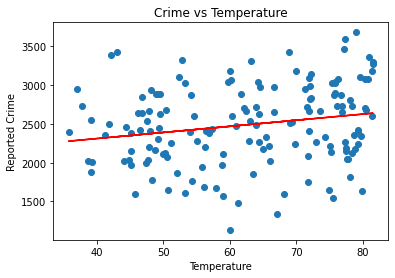

The r-value is 0.20284006606312005


In [33]:
#Scatter Plot: Crime vs Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_scatter,crime_scatter)
regress_values = temp_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(temp_scatter,crime_scatter)
plt.plot(temp_scatter,regress_values,"r-")
plt.xlabel('Temperature')
plt.ylabel('Reported Crime')
plt.title('Crime vs Temperature')
plt.show()
print(f'The r-value is {rvalue}')

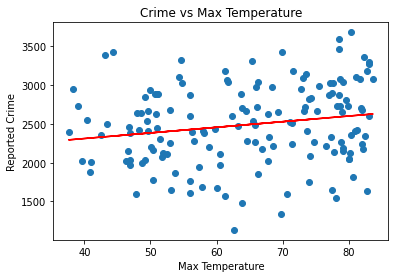

The r-value is 0.1879090505212365


In [34]:
#Scatter Plot: Crime vs Max Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(max_temp_scatter,crime_scatter)
regress_values = max_temp_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(max_temp_scatter,crime_scatter)
plt.plot(max_temp_scatter,regress_values,"r-")
plt.xlabel('Max Temperature')
plt.ylabel('Reported Crime')
plt.title('Crime vs Max Temperature')
plt.show()
print(f'The r-value is {rvalue}')

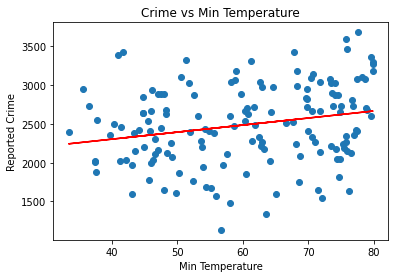

The r-value is 0.23130205470655288


In [35]:
#Scatter Plot: Crime vs Min Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(min_temp_scatter,crime_scatter)
regress_values = min_temp_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(min_temp_scatter,crime_scatter)
plt.plot(min_temp_scatter,regress_values,"r-")
plt.xlabel('Min Temperature')
plt.ylabel('Reported Crime')
plt.title('Crime vs Min Temperature')
plt.show()
print(f'The r-value is {rvalue}')

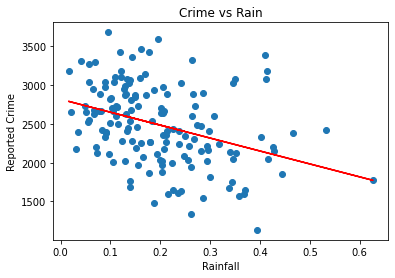

The r-value is -0.3666171491400519


In [36]:
#Scatter Plot: Crime vs Rain
(slope, intercept, rvalue, pvalue, stderr) = linregress(rain_scatter,crime_scatter)
regress_values = rain_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(rain_scatter,crime_scatter)
plt.plot(rain_scatter,regress_values,"r-")
plt.xlabel('Rainfall')
plt.ylabel('Reported Crime')
plt.title('Crime vs Rain')
plt.show()
print(f'The r-value is {rvalue}')

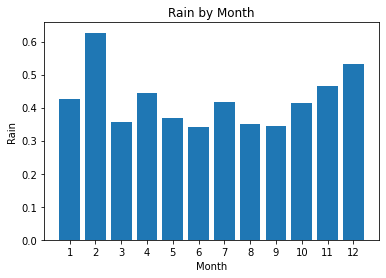

In [37]:
#Scatter Plot: Rain vs Month
(slope, intercept, rvalue, pvalue, stderr) = linregress(month_scatter,rain_scatter)
regress_values = month_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.bar(month_scatter,rain_scatter)
#plt.plot(month_scatter,regress_values,"r-")
plt.xlabel('Month')
plt.ylabel('Rain')
plt.title('Rain by Month')
plt.xticks(np.arange(1, unique_months+1, 1))
plt.show()
#print(f'The r-value is {rvalue}')

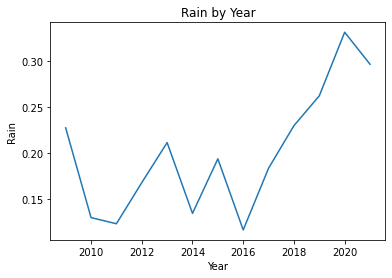

In [38]:
#Scatter Plot: Rain over Years
(slope, intercept, rvalue, pvalue, stderr) = linregress(year_scatter,rain_scatter_year)
regress_values = year_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(year_scatter,rain_scatter_year)
#plt.plot(month_scatter,regress_values,"r-")
plt.xlabel('Year')
plt.ylabel('Rain')
plt.title('Rain by Year')
#plt.xticks(np.arange(2009, unique_years+1, 1))
plt.show()
#print(f'The r-value is {rvalue}')

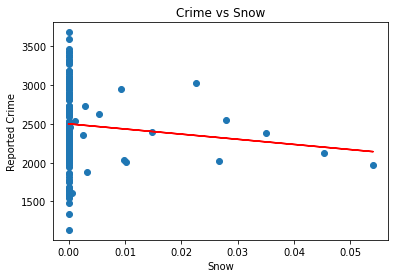

The r-value is -0.09552852094205


In [39]:
#Scatter Plot: Crime vs Snow
(slope, intercept, rvalue, pvalue, stderr) = linregress(snow_scatter,crime_scatter)
regress_values = snow_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(snow_scatter,crime_scatter)
plt.plot(snow_scatter,regress_values,"r-")
plt.xlabel('Snow')
plt.ylabel('Reported Crime')
plt.title('Crime vs Snow')
plt.show()
print(f'The r-value is {rvalue}')

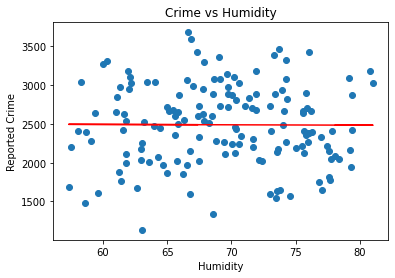

The r-value is -0.0056481318896738466


In [40]:
#Scatter Plot: Crime vs Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(humidity_scatter,crime_scatter)
regress_values = humidity_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(humidity_scatter,crime_scatter)
plt.plot(humidity_scatter,regress_values,"r-")
plt.xlabel('Humidity')
plt.ylabel('Reported Crime')
plt.title('Crime vs Humidity')
plt.show()
print(f'The r-value is {rvalue}')

In [41]:
cases

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,03/19/2020,FL,386,NaN,NaN,76,0.0,12,NaN,NaN,2,0.0,03/19/2020 12:00:00 AM,Not agree,Not agree
2,06/11/2021,TX,2965966,NaN,NaN,1463,355.0,51158,NaN,NaN,17,0.0,06/13/2021 12:00:00 AM,Not agree,Not agree
3,03/01/2021,CO,438745,411869.0,26876.0,677,60.0,5952,5218.0,734.0,1,0.0,03/01/2021 12:00:00 AM,Agree,Agree
4,08/22/2020,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,08/23/2020 02:15:28 PM,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38695,03/08/2020,OH,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
38696,04/30/2021,SD,122660,NaN,NaN,128,17.0,1967,1601.0,366.0,5,1.0,05/01/2021 01:43:22 PM,NaN,Agree
38697,06/29/2021,NM,205484,NaN,NaN,46,0.0,4396,NaN,NaN,0,0.0,07/01/2021 12:00:00 AM,NaN,Not agree
38698,03/10/2021,SD,113962,NaN,NaN,209,37.0,1904,1546.0,358.0,3,0.0,03/11/2021 03:36:21 PM,NaN,Agree


In [42]:
cases = cases.loc[cases['state'] == 'GA']
cases

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
12,07/20/2020,GA,147804,143697.0,4107.0,2766,317.0,3176,3176.0,0.0,3,0.0,07/21/2020 10:50:17 AM,Agree,Agree
14,05/21/2020,GA,38356,38334.0,22.0,687,0.0,1758,1758.0,0.0,69,0.0,05/22/2020 11:31:45 AM,Agree,Agree
16,10/23/2021,GA,1625399,1257310.0,368089.0,0,0.0,28519,24357.0,4162.0,0,0.0,10/25/2021 03:25:56 PM,Agree,Agree
41,08/12/2020,GA,232148,223995.0,8153.0,3767,215.0,4456,4456.0,0.0,105,0.0,08/13/2020 10:12:28 AM,Agree,Agree
58,02/21/2020,GA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36066,01/01/2021,GA,677589,575395.0,102194.0,11137,2418.0,10958,9889.0,1069.0,24,7.0,01/02/2021 02:50:51 PM,Agree,Agree
36067,11/24/2020,GA,454732,408644.0,46088.0,3676,1252.0,9221,8648.0,573.0,6,2.0,11/25/2020 02:53:15 PM,Agree,Agree
36076,12/21/2020,GA,591438,512699.0,78739.0,3520,409.0,10399,9453.0,946.0,16,0.0,12/22/2020 02:35:48 PM,Agree,Agree
36088,08/14/2021,GA,1259081,987277.0,271804.0,6466,1778.0,21990,18998.0,2992.0,12,1.0,08/16/2021 12:55:48 PM,Agree,Agree


In [43]:
#insert year/month/day 
cases.insert(1,'occur_year',cases['submission_date'].str[-4:])
cases.insert(2,'occur_month',cases['submission_date'].str[:2])
cases

,submission_date,occur_year,occur_month,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
12,07/20/2020,2020,07,GA,147804,143697.0,4107.0,2766,317.0,3176,3176.0,0.0,3,0.0,07/21/2020 10:50:17 AM,Agree,Agree
14,05/21/2020,2020,05,GA,38356,38334.0,22.0,687,0.0,1758,1758.0,0.0,69,0.0,05/22/2020 11:31:45 AM,Agree,Agree
16,10/23/2021,2021,10,GA,1625399,1257310.0,368089.0,0,0.0,28519,24357.0,4162.0,0,0.0,10/25/2021 03:25:56 PM,Agree,Agree
41,08/12/2020,2020,08,GA,232148,223995.0,8153.0,3767,215.0,4456,4456.0,0.0,105,0.0,08/13/2020 10:12:28 AM,Agree,Agree
58,02/21/2020,2020,02,GA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36066,01/01/2021,2021,01,GA,677589,575395.0,102194.0,11137,2418.0,10958,9889.0,1069.0,24,7.0,01/02/2021 02:50:51 PM,Agree,Agree
36067,11/24/2020,2020,11,GA,454732,408644.0,46088.0,3676,1252.0,9221,8648.0,573.0,6,2.0,11/25/2020 02:53:15 PM,Agree,Agree
36076,12/21/2020,2020,12,GA,591438,512699.0,78739.0,3520,409.0,10399,9453.0,946.0,16,0.0,12/22/2020 02:35:48 PM,Agree,Agree
36088,08/14/2021,2021,08,GA,1259081,987277.0,271804.0,6466,1778.0,21990,18998.0,2992.0,12,1.0,08/16/2021 12:55:48 PM,Agree,Agree


In [44]:
ga_cases = cases.groupby(['occur_year', 'occur_month'], as_index = False).agg({'submission_date': ['max'],'tot_cases': ['mean'],'tot_death': ['mean']})
ga_cases.columns = ['occur_year','occur_month','month_end_date','tot_cases (mean)','tot_death (mean)']
ga_cases['tot_cases (mean)'] = ga_cases['tot_cases (mean)'].round(0)
ga_cases

,occur_year,occur_month,month_end_date,tot_cases (mean),tot_death (mean)
0,2020,01,01/31/2020,0.0,0.000000
1,2020,02,02/29/2020,0.0,0.000000
2,2020,03,03/31/2020,814.0,23.258065
3,2020,04,04/30/2020,15104.0,603.200000
4,2020,05,05/31/2020,35400.0,1591.354839
5,2020,06,06/30/2020,60279.0,2476.233333
6,2020,07,07/31/2020,134586.0,3170.483871
7,2020,08,08/31/2020,241182.0,4685.935484
8,2020,09,09/30/2020,311654.0,6424.400000
9,2020,10,10/31/2020,361165.0,7541.709677


In [45]:
ga_cases_clean = ga_cases.drop(ga_cases[(ga_cases['occur_year'] == '2021') & (ga_cases['occur_month'] == '10')].index)
ga_cases_clean

,occur_year,occur_month,month_end_date,tot_cases (mean),tot_death (mean)
0,2020,01,01/31/2020,0.0,0.000000
1,2020,02,02/29/2020,0.0,0.000000
2,2020,03,03/31/2020,814.0,23.258065
3,2020,04,04/30/2020,15104.0,603.200000
4,2020,05,05/31/2020,35400.0,1591.354839
5,2020,06,06/30/2020,60279.0,2476.233333
6,2020,07,07/31/2020,134586.0,3170.483871
7,2020,08,08/31/2020,241182.0,4685.935484
8,2020,09,09/30/2020,311654.0,6424.400000
9,2020,10,10/31/2020,361165.0,7541.709677


In [46]:
#cast date values as numbers to allow for numerical comparison '>''<''=='
ga_cases_clean[['occur_year', 'occur_month']] = ga_cases_clean[['occur_year','occur_month']].apply(pd.to_numeric)


In [47]:
#merge crime and COVID data on year and month
crime_covid = pd.merge(ga_cases_clean,crime_year_month,  how="left", on=['occur_year','occur_month'])
crime_covid

,occur_year,occur_month,month_end_date,tot_cases (mean),tot_death (mean),no._offenses
0,2020,1,01/31/2020,0.0,0.000000,2197
1,2020,2,02/29/2020,0.0,0.000000,1779
2,2020,3,03/31/2020,814.0,23.258065,1575
3,2020,4,04/30/2020,15104.0,603.200000,1132
4,2020,5,05/31/2020,35400.0,1591.354839,1342
5,2020,6,06/30/2020,60279.0,2476.233333,1646
6,2020,7,07/31/2020,134586.0,3170.483871,1634
7,2020,8,08/31/2020,241182.0,4685.935484,1817
8,2020,9,09/30/2020,311654.0,6424.400000,1745
9,2020,10,10/31/2020,361165.0,7541.709677,2329


In [48]:
#declare data sets for plotting
crime_scatter = crime_covid.iloc[:,5]
tot_cases_scatter = crime_covid.iloc[:,3]
tot_death_scatter = crime_covid.iloc[:,4]
time_plot = crime_covid.iloc[:,2]

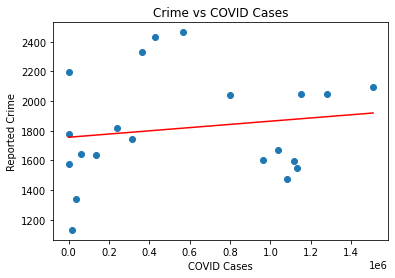

The r-value is 0.15515338975040466


In [49]:
#Scatter Plot: Crime vs COVID Cases
(slope, intercept, rvalue, pvalue, stderr) = linregress(tot_cases_scatter,crime_scatter)
regress_values = tot_cases_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tot_cases_scatter,crime_scatter)
plt.plot(tot_cases_scatter,regress_values,"r-")
plt.xlabel('COVID Cases')
plt.ylabel('Reported Crime')
plt.title('Crime vs COVID Cases')
#plt.xticks(np.arange(0, crime_covid["tot_cases (mean)"].max(), 1000))
plt.show()
print(f'The r-value is {rvalue}')

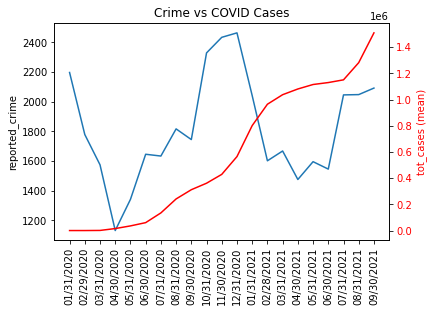

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time_plot, crime_scatter)
ax1.set_ylabel('reported_crime')
ax1.tick_params(axis='x', labelrotation=90 )
ax2 = ax1.twinx()
ax2.plot(time_plot, tot_cases_scatter, 'r-')
ax2.set_ylabel('tot_cases (mean)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.title('Crime vs COVID Cases')
plt.show()

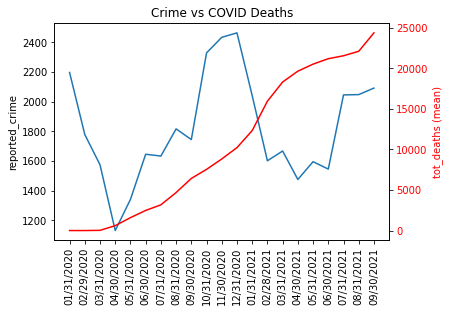

In [58]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time_plot, crime_scatter)
ax1.set_ylabel('reported_crime')
ax1.tick_params(axis='x', labelrotation=90 )
ax2 = ax1.twinx()
ax2.plot(time_plot, tot_death_scatter, 'r-')
ax2.set_ylabel('tot_deaths (mean)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.title('Crime vs COVID Deaths')
plt.show()

In [52]:
crime_year_month_type = crime_df_complete.groupby(['occur_year', 'occur_month','UC2_Literal'], as_index = False).agg({'offense_id': ['count']})
crime_year_month_type.columns = ['occur_year','occur_month','offense_type','no._offenses']
crime_year_month_type


,occur_year,occur_month,offense_type,no._offenses
0,2009,1,AGG ASSAULT,219
1,2009,1,AUTO THEFT,505
2,2009,1,BURGLARY-NONRES,200
3,2009,1,BURGLARY-RESIDENCE,654
4,2009,1,HOMICIDE,7
...,...,...,...,...
1476,2021,9,BURGLARY,134
1477,2021,9,HOMICIDE,15
1478,2021,9,LARCENY-FROM VEHICLE,937
1479,2021,9,LARCENY-NON VEHICLE,457


In [53]:
crime_covid_w_offense_test = pd.merge(ga_cases_clean,crime_df_complete)
crime_covid_w_offense_test = crime_covid_w_offense_test[['month_end_date','UC2_Literal']].copy()
crime_covid_w_offense_test

,month_end_date,UC2_Literal
0,01/31/2020,LARCENY-NON VEHICLE
1,01/31/2020,AUTO THEFT
2,01/31/2020,AUTO THEFT
3,01/31/2020,HOMICIDE
4,01/31/2020,HOMICIDE
...,...,...
38204,09/30/2021,AUTO THEFT
38205,09/30/2021,LARCENY-NON VEHICLE
38206,09/30/2021,LARCENY-NON VEHICLE
38207,09/30/2021,BURGLARY


In [54]:
crime_covid_w_offense_me_pivot = pd.pivot_table(crime_covid_w_offense_test, columns = ['UC2_Literal'] ,index=['month_end_date'], aggfunc = 'size')
crime_covid_w_offense_me_pivot = crime_covid_w_offense_me_pivot.fillna(0)
crime_covid_w_offense_me_pivot.index = pd.to_datetime(crime_covid_w_offense_me_pivot.index)
crime_covid_w_offense_me_pivot = crime_covid_w_offense_me_pivot.sort_index()
#cobra_09['occur_date']= pd.to_datetime(cobra_09['occur_date'])
crime_covid_w_offense_me_pivot.index = crime_covid_w_offense_me_pivot.index.strftime("%m/%d/%Y")
crime_covid_w_offense_me_pivot

UC2_Literal,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY
month_end_date,,,,,,,,
01/31/2020,129.0,273.0,202.0,5.0,947.0,569.0,0.0,72.0
02/29/2020,122.0,228.0,150.0,7.0,727.0,498.0,0.0,47.0
03/31/2020,160.0,206.0,171.0,9.0,567.0,398.0,2.0,62.0
04/30/2020,161.0,161.0,164.0,9.0,293.0,289.0,0.0,55.0
05/31/2020,216.0,167.0,257.0,9.0,308.0,328.0,0.0,57.0
06/30/2020,201.0,223.0,225.0,16.0,562.0,329.0,0.0,90.0
07/31/2020,212.0,298.0,138.0,21.0,592.0,323.0,0.0,50.0
08/31/2020,233.0,280.0,153.0,20.0,690.0,361.0,0.0,80.0
09/30/2020,209.0,287.0,164.0,6.0,638.0,345.0,0.0,96.0


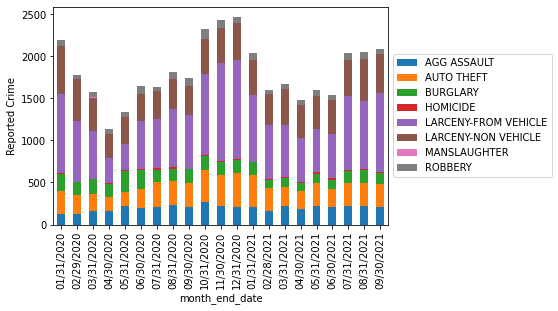

In [63]:
ax = crime_covid_w_offense_me_pivot.plot(kind='bar', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Reported Crime")
plt.show()

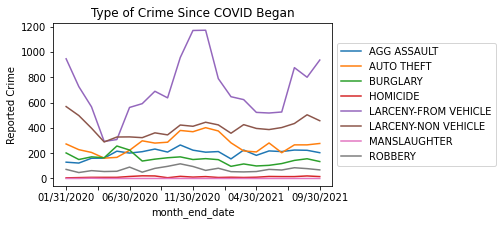

In [64]:
ax = crime_covid_w_offense_me_pivot.plot(figsize=(5, 3))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Reported Crime")
plt.title('Type of Crime Since COVID Began')
plt.show()